              precision    recall  f1-score   support

           0       0.99      0.45      0.62       234
           1       0.75      1.00      0.86       390

    accuracy                           0.79       624
   macro avg       0.87      0.72      0.74       624
weighted avg       0.84      0.79      0.77       624

AUC-ROC: 0.9436993206223976
Confusion Matrix:
 [[105 129]
 [  1 389]]


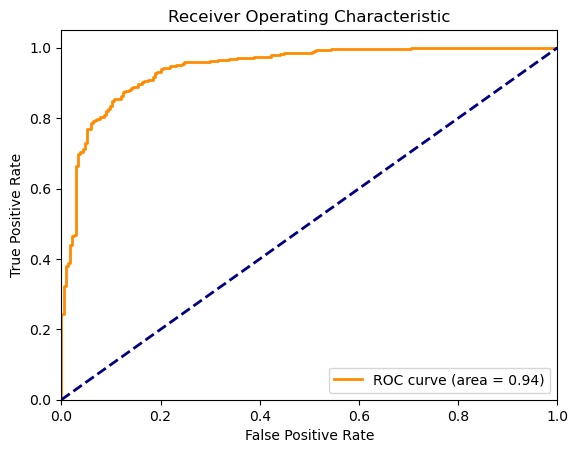

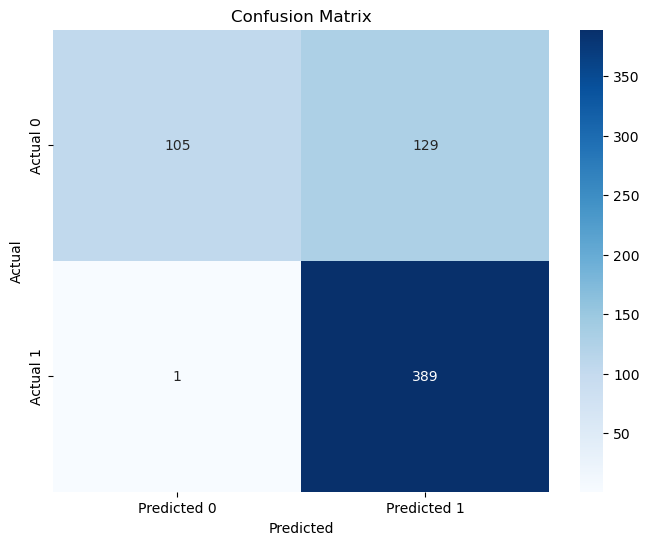

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt


# Specify paths to the CSV files
train_file = r'C:\Nabeela\DSI\team_project\data\processed\data_3\data_3\train_data.csv'
test_file = r'C:\Nabeela\DSI\team_project\data\processed\data_3\data_3\test_data.csv'

# Load training data without headers
train_data = pd.read_csv(train_file)
X_train = train_data.drop(train_data.columns[-1], axis=1)  
y_train = train_data[train_data.columns[-1]]

# Load test data without headers
test_data = pd.read_csv(test_file)
X_test = test_data.drop(test_data.columns[-1], axis=1) 
y_test = test_data[test_data.columns[-1]]

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_prob))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()